# Двуслойнная нейронная сеть для задачи классовой классификации

Создание датасета

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')
for j in range(K):
  ix = range(N * j,N * (j + 1))
  r = np.linspace(0.0, 1, N)
  t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

Отрисовка датасета

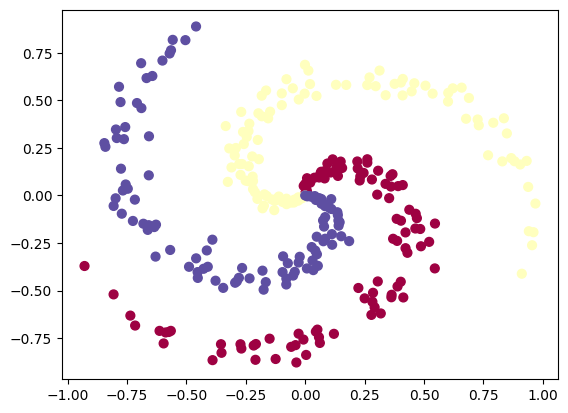

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

# Обучение нейронной сети

N - размер батча (batch_size, нужно для метода оптимизации);

D_in - размерность входа (количество признаков у объекта);

H - размерность скрытых слоёв;

D_out - размерность выходного слоя (суть - количество классов)

Определяем модель и задаем функцию потерь

In [4]:
N, D_in, H, D_out = 64, 2, 100, 3
# Определяем модель и задаем функцию потерь
two_layer_net = torch.nn.Sequential( # связывание слоев
  torch.nn.Linear(D_in, H), # линейное преобразование изменяет размер входных данных D_in на размер выхлдных H
  torch.nn.ReLU(), # функция активации: заменяет все отрицательные значения на 0, положительные без изменений
  torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate) # стоахостический гардиентный спуск
for t in range(500):
# forward
  y_pred = two_layer_net(X)
# loss
  loss = loss_fn(y_pred, y)
  #print('{} {}'.format(t, loss.data))
# зануляем градиенты (чтобы не было остатка с предыдущего шага)
  optimizer.zero_grad()
# backward
  loss.backward()
# обновляем
  optimizer.step()

Несмотря на то, что это задача 3-х классовой классификации и столбец y нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало.

Дело в том, что PyTorch сам делает OneHot в таком случае.

# Тестирование сети

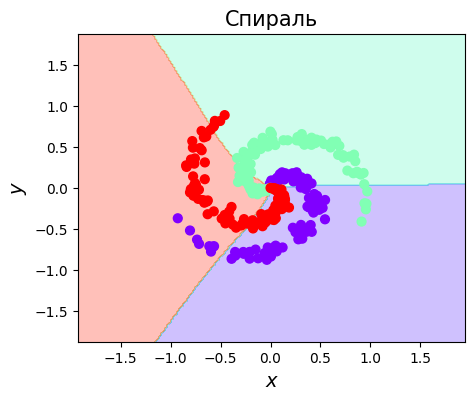

In [5]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h)) # Return a list of coordinate matrices from coordinate vectors
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

# Обучение с лучшими гиперпараметрами
# Трехслойная нейронная сеть  

Увеличим шаг гардиентного спуска с 1e-4 до 1e-3;

Увеличим количество эпох с 500 до 1000

In [6]:
N, D_in, H, D_out = 64, 2, 100, 3
better_net = torch.nn.Sequential( # связывание слоев
  torch.nn.Linear(D_in, H),
  torch.nn.ReLU(), # применение функции ReLu
  torch.nn.Linear(H, H),
  torch.nn.ReLU(),
  torch.nn.Linear(H, H),
  torch.nn.ReLU(),
  torch.nn.Linear(H, D_out)
)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')
learning_rate = 1e-3
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)
for t in range(1000):
# forward
  y_pred = better_net(X)
# loss
  loss = loss_fn(y_pred, y)
  #print('{} {}'.format(t, loss.data))
# зануляем градиенты (чтобы не было остатка с предыдущего шага)
  optimizer.zero_grad()
# backward
  loss.backward()
# обновляем
  optimizer.step()

# Тестирование подобранного варианта

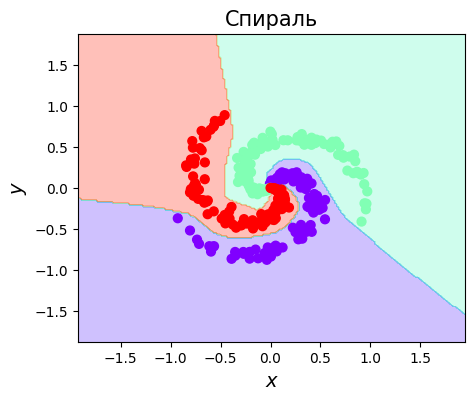

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

# Четырехслойная нейронная сеть

In [12]:
N, D_in, H, D_out = 64, 2, 100, 3
better_net = torch.nn.Sequential( # связывание слоев
  torch.nn.Linear(D_in, H),
  torch.nn.ReLU(), # применение функции ReLu
  torch.nn.Linear(H, H),
  torch.nn.ReLU(),
  torch.nn.Linear(H, H),
  torch.nn.ReLU(),
  torch.nn.Linear(H, H),
  torch.nn.ReLU(),
  torch.nn.Linear(H, D_out)
)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')
learning_rate = 1e-3
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)
for t in range(10000):
# forward
  y_pred = better_net(X)
# loss
  loss = loss_fn(y_pred, y)
  #print('{} {}'.format(t, loss.data))
# зануляем градиенты (чтобы не было остатка с предыдущего шага)
  optimizer.zero_grad()
# backward
  loss.backward()
# обновляем
  optimizer.step()

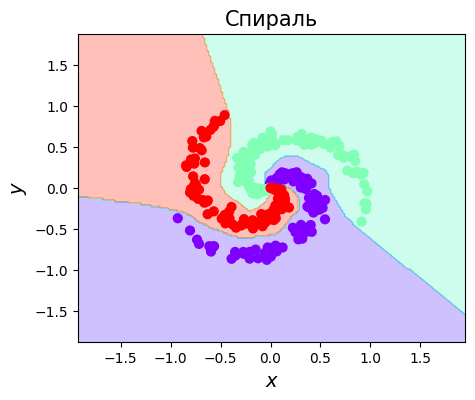

In [13]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();